Video Game Sales4

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 

from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
games = pd.read_csv("E:/Medium/2 Learned/Video Game Sales/vgsales.csv")

Basic information

In [3]:
ProfileReport(games, title = 'Basic information about data')

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

For a little more correct representation of the data, I have restored released dates of 22 games, which global sales more than 1 millon $.

In [4]:
games.iloc[179, 3] = 2004
games.iloc[377, 3] = 2004
games.iloc[431, 3] = 2008
games.iloc[470, 3] = 2006
games.iloc[607, 3] = 1978
games.iloc[624, 3] = 2007
games.iloc[649, 3] = 2001
games.iloc[652, 3] = 2008
games.iloc[711, 3] = 2006
games.iloc[782, 3] = 2007
games.iloc[1126, 3] = 2010
games.iloc[1133, 3] = 2007
games.iloc[1303, 3] = 1998
games.iloc[1433, 3] = 2011
games.iloc[1498, 3] = 2008
games.iloc[1513, 3] = 1979
games.iloc[1585, 3] = 1977
games.iloc[1649, 3] = 2003
games.iloc[1697, 3] = 2002
games.iloc[1837, 3] = 2007
games.iloc[1990, 3] = 1999
games.iloc[2019, 3] = 1997

In [5]:
games_sales = games.fillna(0)
games_sales = games_sales.drop(games_sales.query('Year == 0').index, axis = 0)
games_sales['Year'] = games_sales['Year'].astype(int)

In [6]:
games_sales = games_sales.groupby('Year').agg({'NA_Sales': 'sum', 
                                               'EU_Sales': 'sum', 
                                               'JP_Sales': 'sum', 
                                               'Other_Sales': 'sum',
                                               'Global_Sales': 'sum'}).reset_index()
games_sales.head(10)

Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0  1977      1.17      0.07      0.00         0.01          1.25
1  1978      2.36      0.14      0.00         0.03          2.53
2  1979      1.21      0.08      0.00         0.01          1.30
3  1980     10.59      0.67      0.00         0.12         11.38
4  1981     33.40      1.96      0.00         0.32         35.77
5  1982     26.92      1.65      0.00         0.31         28.86
6  1983      7.76      0.80      8.10         0.14         16.79
7  1984     33.28      2.10     14.27         0.70         50.36
8  1985     33.73      4.74     14.56         0.92         53.94
9  1986     12.50      2.84     19.81         1.93         37.07

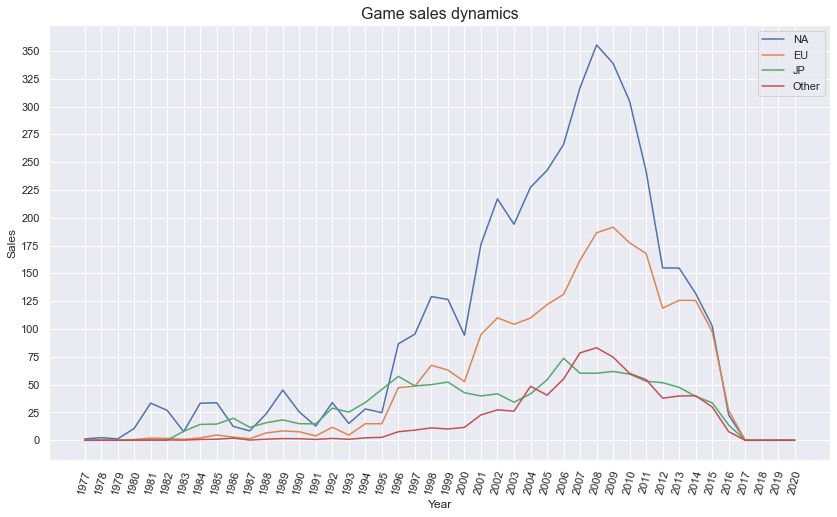

In [7]:
sns.set_theme(style = 'darkgrid')
plt.figure(figsize = (14,8))
plt.title('Game sales dynamics', size = 16)
plt.xticks(range(1977, 2021, 1), rotation = 75)
plt.yticks(range(0, 401, 25))
plt.ylabel('Sales')
sns.lineplot(x = 'Year', y = 'NA_Sales', data = games_sales, label = 'NA')
sns.lineplot(x = 'Year', y = 'EU_Sales', data = games_sales, label = 'EU')
sns.lineplot(x = 'Year', y = 'JP_Sales', data = games_sales, label = 'JP')
sns.lineplot(x = 'Year', y = 'Other_Sales', data = games_sales, label = 'Other')
plt.show()

From 1994 to 2008, there is a constant positive trend, however, then there is a decline, but most likely this is only due to the fact that the author of the dataset updated it for the last time 4 years ago. Why did 1994 become the beginning of a big sales growth? In many ways, 1994 was a landmark year for the gaming industry, new genres appeared and existing ones were strengthened. There are many new franchises and companies. And most importantly - the PlayStation 1 is coming to the market!

Game platforms analysis

In [8]:
games_platforms = games.groupby('Platform').agg({'Global_Sales': 'sum'}).sort_values('Global_Sales')
games_platforms.transpose()

Platform      PCFX    GG  3DO  TG16    WS    NG   SCD     DC    GEN    SAT  \
Global_Sales  0.03  0.04  0.1  0.16  1.42  1.44  1.87  15.97  28.36  33.59   

Platform        PSV   WiiU   2600    XOne      GC    SNES     N64     3DS  \
Global_Sales  61.93  81.86  97.08  141.06  199.36  200.05  218.88  247.46   

Platform         NES      GB      XB      PC    PS4     PSP    GBA      PS  \
Global_Sales  251.07  255.45  258.26  258.82  278.1  296.28  318.5  730.66   

Platform          DS     Wii     PS3    X360      PS2  
Global_Sales  822.49  926.71  957.84  979.96  1255.64

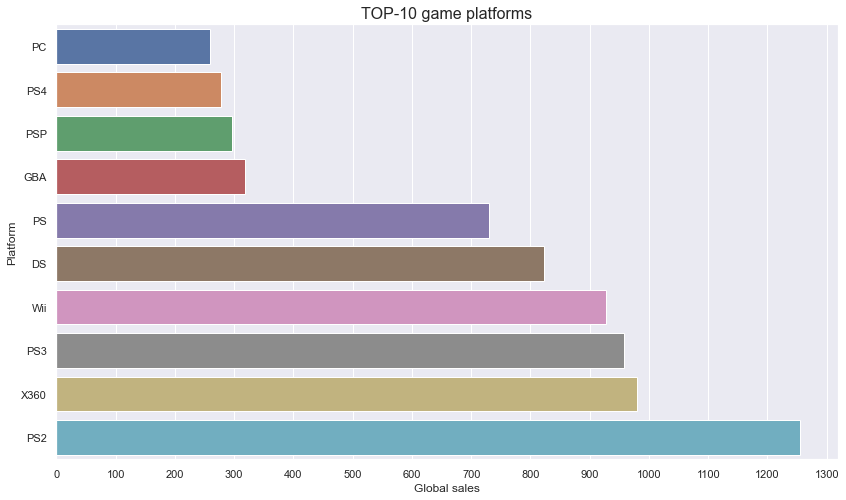

In [9]:
plt.figure(figsize = (14,8))
plt.title('TOP-10 game platforms', size = 16)
plt.xticks(range(0, 1301, 100))
sns.barplot(x = 'Global_Sales', y = 'Platform', data = games_platforms.reset_index().tail(10))
plt.xlabel('Global sales')
plt.show()

According to data, the PS2 had the best sales, and this is true, because it is this gaming platform that is still considered the best-selling in the world. Officially, they have sold more than 150 million devices

 look at the dynamics of released games on TOP-10 gaming platforms

In [10]:
games_2 = games.fillna(0)
games_2 = games_2.drop(games_2.query('Year == 0').index, axis = 0)
games_2['Year'] = games_2['Year'].astype(int)

In [11]:
best_platforms = games_platforms.tail(10).reset_index()['Platform'].to_list()
g_platform_d = games_2.query('Platform == @best_platforms').groupby(['Year', 'Platform']).agg({'Platform': 'count'}).rename(columns = {'Platform': 'Count'})
g_platform_d

Count
Year Platform       
1985 DS            1
     PC            1
1988 PC            1
1992 PC            5
1994 PC            6
...              ...
2016 PS3          32
     PS4         107
     X360          8
2017 PS4           1
2020 DS            1

[119 rows x 1 columns]

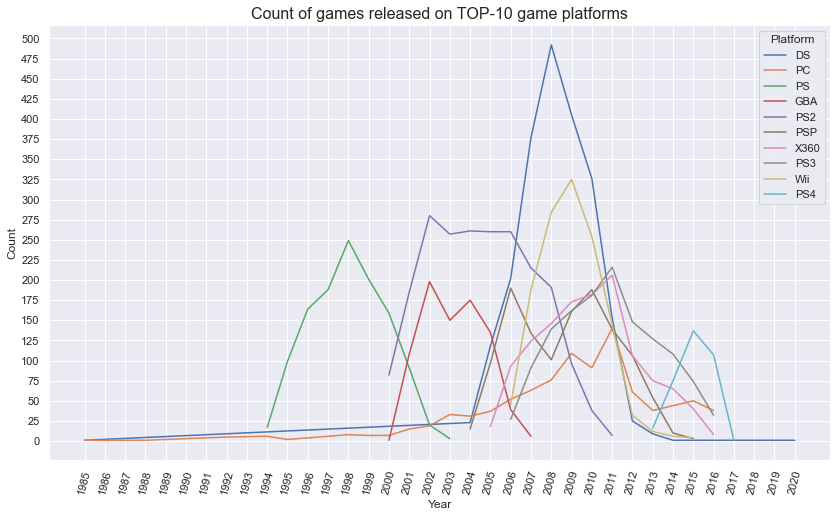

In [12]:
plt.figure(figsize = (14,8))
plt.title('Count of games released on TOP-10 game platforms', size = 16)
sns.lineplot(x = 'Year', y = 'Count', hue = 'Platform', data = g_platform_d)
plt.xticks(range(1985, 2021, 1), rotation = 75)
plt.yticks(range(0, 501, 25))
plt.show()

In general, nothing special, but the count of games released on the DS gaming platform from Nintendo in 2008-2009 is amazing!

Game publishers analysis

In [13]:
games_publishers = games.groupby('Publisher').agg({'Global_Sales': 'sum'}).sort_values('Global_Sales')
games_publishers.transpose()

Publisher     Interworks Unlimited, Inc.  Inti Creates  Epic Games  Otomate  \
Global_Sales                        0.01          0.01        0.01     0.01   

Publisher     Takuyo  Ongakukan  UIG Entertainment  Media Entertainment  \
Global_Sales    0.01       0.01               0.01                 0.01   

Publisher     Piacci  Boost On  EON Digital Entertainment  Interchannel-Holon  \
Global_Sales    0.01      0.01                       0.01                0.01   

Publisher     Ascaron Entertainment  New World Computing  Rain Games  \
Global_Sales                   0.01                 0.01        0.01   

Publisher     Michaelsoft  Naxat Soft  Genterprise  Paradox Development  \
Global_Sales         0.01        0.01         0.01                 0.01   

Publisher     Commseed  Stainless Games  Plenty  King Records  \
Global_Sales      0.01             0.01    0.02          0.02   

Publisher     Karin Entertainment  RED Entertainment  Phoenix Games  Sold Out  \
Global_Sales                 0.02               0.02           0.02      0.02   

Publisher     Technos Japan Corporation  Lighthouse Interactive  Mycom  \
Global_Sales                       0.02                    0.02   0.02   

Publisher     Revolution (Japan)  Quintet  Graphsim Entertainment  \
Global_Sales                0.02     0.02                    0.02   

Publisher     Marvelous Games  Giza10  Giga  Mirai Shounen  fonfun  \
Global_Sales             0.02    0.02  0.02           0.02    0.02   

Publisher     Imageworks  Nitroplus  Gaga  Codemasters Online  Saurus  Visco  \
Global_Sales        0.02       0.02  0.02                0.02    0.02   0.02   

Publisher      GOA  Masque Publishing  Introversion Software  Warashi  \
Global_Sales  0.02               0.02                   0.02     0.02   

Publisher     Blue Byte  Paon Corporation  Datam Polystar  Berkeley  \
Global_Sales       0.03              0.03            0.03      0.03   

Publisher     Maximum Family Games  Nexon  NetRevo  BushiRoad  Dorart  \
Global_Sales                  0.03   0.03     0.03       0.03    0.03   

Publisher     Number None  Cygames  FuRyu Corporation  Aerosoft  Views  \
Global_Sales         0.03     0.03               0.03      0.03   0.03   

Publisher     Intergrow  Just Flight   KSS   ASK  Kamui  Fields  Fuji  HuneX  \
Global_Sales       0.03         0.03  0.03  0.03   0.03    0.03  0.03   0.03   

Publisher     Kando Games  Extreme Entertainment Group  Headup Games  \
Global_Sales         0.03                         0.03          0.03   

Publisher     Kids Station  Sunflowers  id Software  Strategy First  \
Global_Sales          0.03        0.03         0.03            0.03   

Publisher     Kokopeli Digital Studios  Her Interactive  Tryfirst  Gakken  \
Global_Sales                      0.03             0.03      0.03    0.04   

Publisher     Yamasa Entertainment  49Games  imageepoch Inc.  2D Boy  G.Rev  \
Global_Sales                  0.04     0.04             0.04    0.04   0.04   

Publisher     Legacy Interactive  Kool Kizz  Riverhillsoft  Societa  \
Global_Sales                0.04       0.04           0.04     0.04   

Publisher     Summitsoft  Devolver Digital  Playmore  MLB.com  Ivolgamus  \
Global_Sales        0.04              0.04      0.04     0.04       0.04   

Publisher     Alvion  Marvel Entertainment  Mamba Games  \
Global_Sales    0.04                  0.05         0.05   

Publisher     Dusenberry Martin Racing  Easy Interactive  GN Software  \
Global_Sales                      0.05              0.05         0.05   

Publisher     Max Five  MediaQuest  Lexicon Entertainment  Milestone S.r.l  \
Global_Sales      0.05        0.05                   0.05             0.05   

Publisher     Minato Station  Monte Christo Multimedia  Focus Multimedia  \
Global_Sales            0.05                      0.05              0.05   

Publisher     Ertain  Navarre Corp  TechnoSoft  Pony Canyon  Sweets  \
Global_Sales    0.05          0.05        0.05         

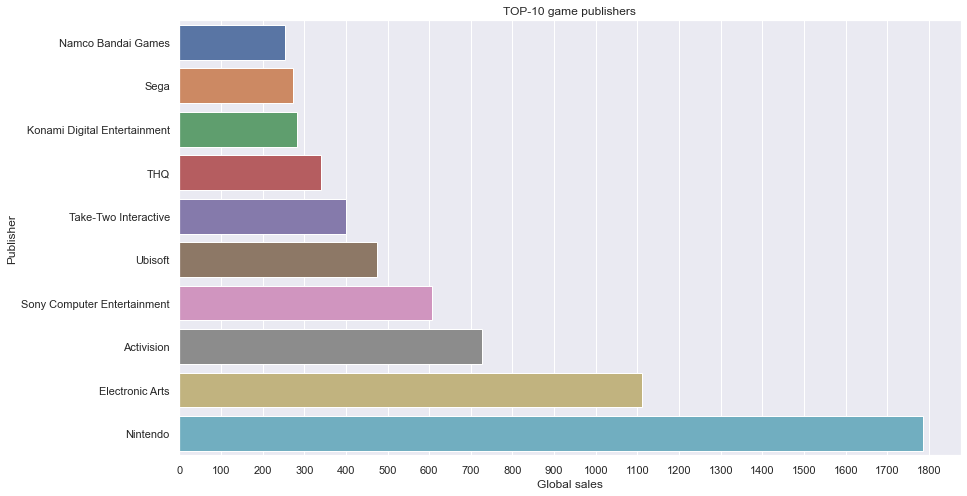

In [14]:
plt.figure(figsize = (14,8))
plt.title('TOP-10 game publishers')
plt.xticks(range(0, 1801, 100))
sns.barplot(x = 'Global_Sales', y = 'Publisher', data = games_publishers.reset_index().tail(10))
plt.xlabel('Global sales')
plt.show()

Nintendo is a company that has revolutionized video gaming in the late 20th century. This publisher owns the top 15 best-selling games in the world! Although now Nintendo has lost its place, but it will forever remain in the history of games.

In [15]:
games.loc[:, ['Rank', 'Name', 'Year', 'Publisher', 'Global_Sales']].head(15)

Rank                         Name    Year Publisher  Global_Sales
0      1                   Wii Sports  2006.0  Nintendo         82.74
1      2            Super Mario Bros.  1985.0  Nintendo         40.24
2      3               Mario Kart Wii  2008.0  Nintendo         35.82
3      4            Wii Sports Resort  2009.0  Nintendo         33.00
4      5     Pokemon Red/Pokemon Blue  1996.0  Nintendo         31.37
5      6                       Tetris  1989.0  Nintendo         30.26
6      7        New Super Mario Bros.  2006.0  Nintendo         30.01
7      8                     Wii Play  2006.0  Nintendo         29.02
8      9    New Super Mario Bros. Wii  2009.0  Nintendo         28.62
9     10                    Duck Hunt  1984.0  Nintendo         28.31
10    11                   Nintendogs  2005.0  Nintendo         24.76
11    12                Mario Kart DS  2005.0  Nintendo         23.42
12    13  Pokemon Gold/Pokemon Silver  1999.0  Nintendo         23.10
13    14                      Wii Fit  2007.0  Nintendo         22.72
14    15                 Wii Fit Plus  2009.0  Nintendo         22.00

look at the dynamics of released games of TOP-10 gaming publishers

In [16]:
best_publishers = games_publishers.tail(10).reset_index()['Publisher'].to_list()
g_publisher_d = games_2.query('Publisher == @best_publishers').groupby(['Year', 'Publisher']).agg({'Publisher': 'count'}).rename(columns = {'Publisher': 'Count'})
g_publisher_d

Count
Year Publisher                         
1980 Activision                       5
1981 Activision                       6
1982 Activision                       4
     Sega                             1
1983 Activision                       3
...                                 ...
2016 Sony Computer Entertainment      5
     Take-Two Interactive            12
     Ubisoft                         13
2017 Sega                             2
2020 Ubisoft                          1

[266 rows x 1 columns]

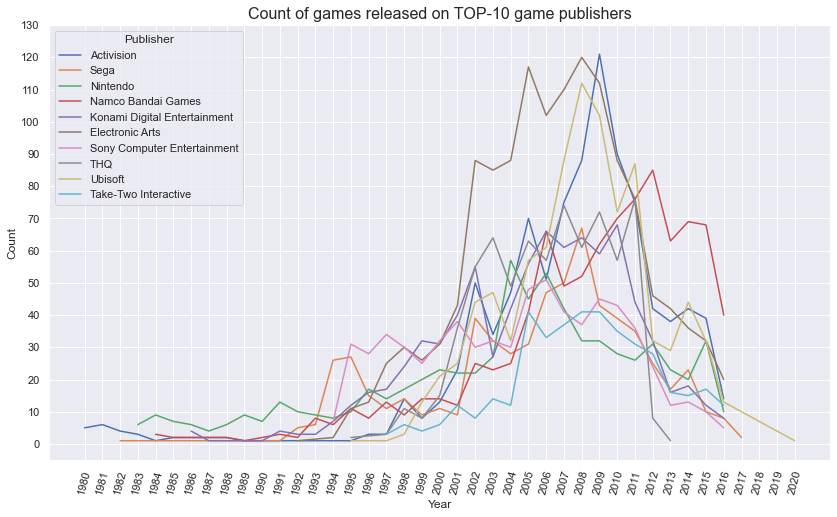

In [17]:
plt.figure(figsize = (14,8))
plt.title('Count of games released on TOP-10 game publishers', size = 16)
sns.lineplot(x = 'Year', y = 'Count', hue = 'Publisher', data = g_publisher_d)
plt.xticks(range(1980, 2021, 1), rotation = 75)
plt.yticks(range(0, 131, 10))
plt.show()

Based on the data, we can see that the first game publishers were Activision, SEGA and Nintendo. Interesting observation, Activision still holds a leading position together with such giants of the gaming industry as Electronic Arts and Ubisoft.

Game genre analysis

In [18]:
games_genres = games.groupby('Genre').agg({'Global_Sales': 'sum'}).sort_values('Global_Sales')
games_genres.transpose()

Genre         Strategy  Adventure  Puzzle  Simulation  Fighting  Racing  \
Global_Sales    175.12     239.04  244.95       392.2    448.91  732.04   

Genre           Misc  Platform  Role-Playing  Shooter   Sports   Action  
Global_Sales  809.96    831.37        927.37  1037.37  1330.93  1751.18

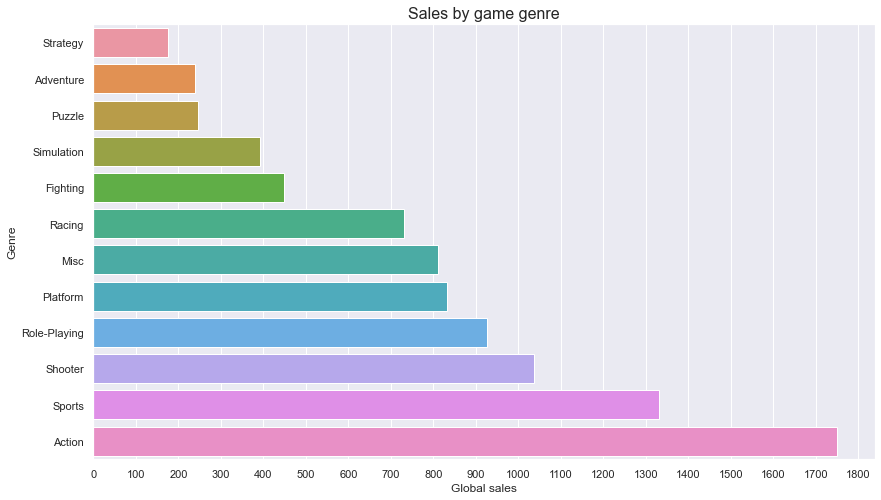

In [19]:
plt.figure(figsize = (14,8))
plt.title('Sales by game genre', size = 16)
plt.xticks(range(0, 1801, 100))
sns.barplot(x = 'Global_Sales', y = 'Genre', data = games_genres.reset_index())
plt.xlabel('Global sales')
plt.show()

see if the regions have any preferences for the genre of the game

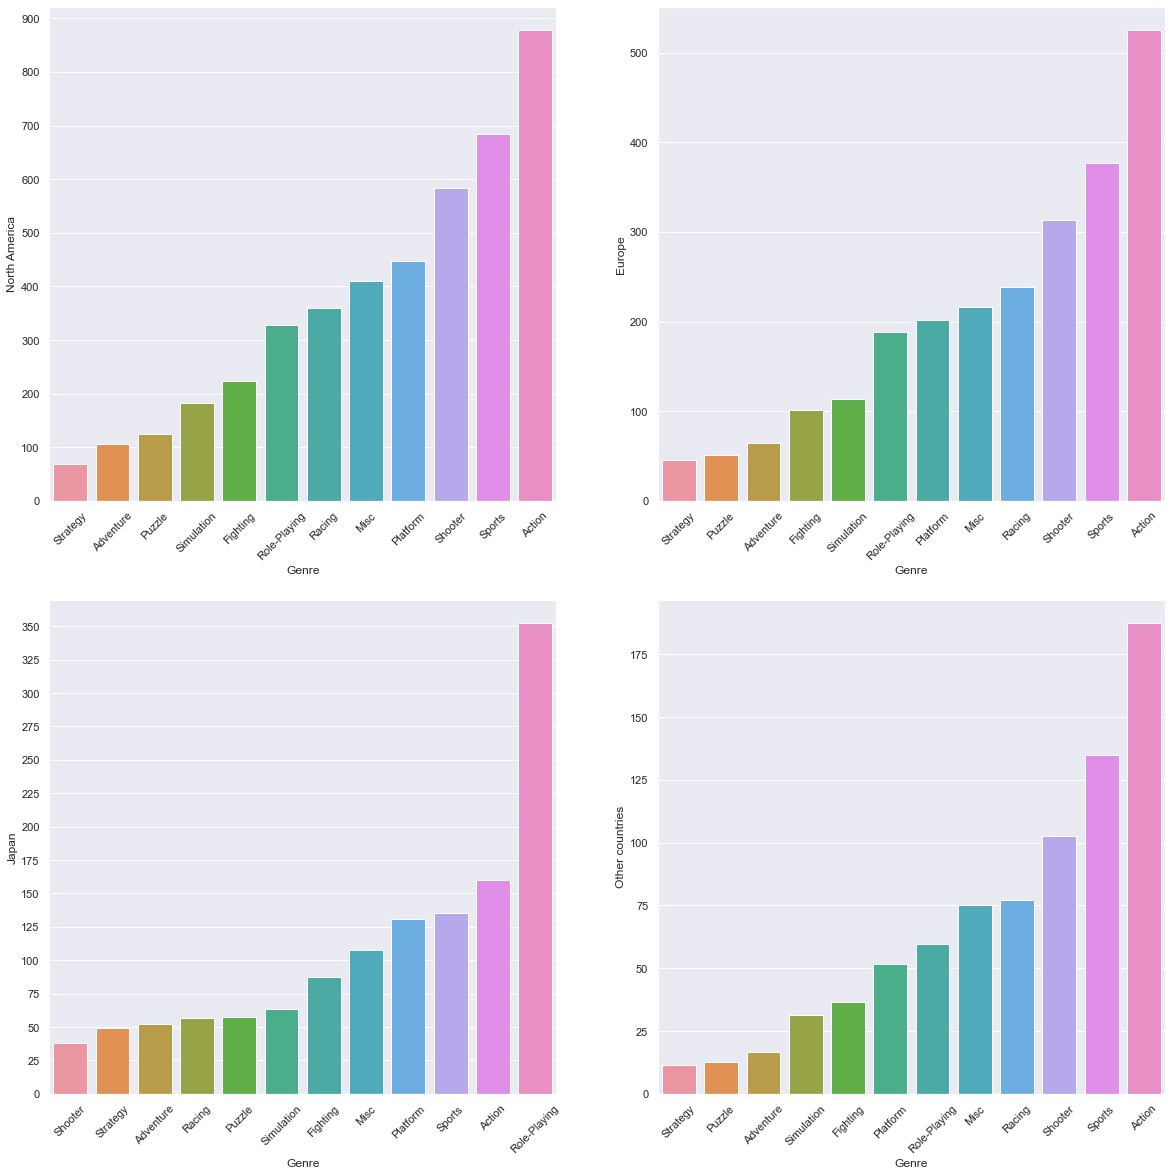

In [20]:
fig = plt.figure(figsize = (20, 20))

plt.subplot(221)
plt.xticks(rotation = 45)
plt.yticks(range(0, 901, 100))
sns.barplot(x = 'Genre', y = 'NA_Sales', data = games.groupby('Genre').agg({'NA_Sales': 'sum'}).sort_values('NA_Sales').reset_index())
plt.ylabel('North America')

plt.subplot(222)
plt.xticks(rotation = 45)
plt.yticks(range(0, 601, 100))
sns.barplot(x = 'Genre', y = 'EU_Sales', data = games.groupby('Genre').agg({'EU_Sales': 'sum'}).sort_values('EU_Sales').reset_index())
plt.ylabel('Europe')

plt.subplot(223)
plt.xticks(rotation = 45)
plt.yticks(range(0, 401, 25))
sns.barplot(x = 'Genre', y = 'JP_Sales', data = games.groupby('Genre').agg({'JP_Sales': 'sum'}).sort_values('JP_Sales').reset_index())
plt.ylabel('Japan')

plt.subplot(224)
plt.xticks(rotation = 45)
sns.barplot(x = 'Genre', y = 'Other_Sales', data = games.groupby('Genre').agg({'Other_Sales': 'sum'}).sort_values('Other_Sales').reset_index())
plt.ylabel('Other countries')


plt.show()

All regions almost equally prefer the same genres, except for Japan. Japan prefers more Role-Playing than Action.

Most popular games in North America in 20th century

In [21]:
best_games_NA_XX = games.query('Year < 2000').sort_values('NA_Sales').tail(5).loc[:, ['Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales']]
best_games_NA_XX

Name Platform         Genre Publisher  NA_Sales
4   Pokemon Red/Pokemon Blue       GB  Role-Playing  Nintendo     11.27
18         Super Mario World     SNES      Platform  Nintendo     12.78
5                     Tetris       GB        Puzzle  Nintendo     23.20
9                  Duck Hunt      NES       Shooter  Nintendo     26.93
1          Super Mario Bros.      NES      Platform  Nintendo     29.08

Most popular games in North America in 21st century

In [22]:
best_games_NA_XXI = games.query('Year >= 2000').sort_values('NA_Sales').tail(5).loc[:, ['Name', 'Platform', 'Genre', 'Publisher', 'NA_Sales']]
best_games_NA_XXI

Name Platform     Genre               Publisher  \
8   New Super Mario Bros. Wii      Wii  Platform                Nintendo   
15         Kinect Adventures!     X360      Misc  Microsoft Game Studios   
3           Wii Sports Resort      Wii    Sports                Nintendo   
2              Mario Kart Wii      Wii    Racing                Nintendo   
0                  Wii Sports      Wii    Sports                Nintendo   

    NA_Sales  
8      14.59  
15     14.97  
3      15.75  
2      15.85  
0      41.49

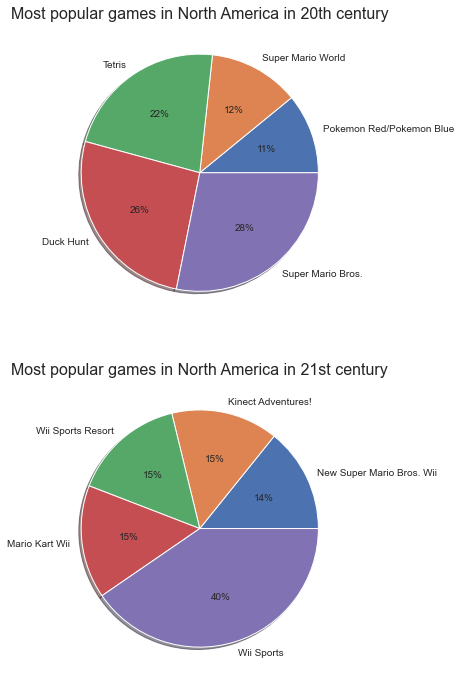

In [23]:
fig = plt.figure(figsize = (12, 12))

plt.subplot(211)
plt.title('Most popular games in North America in 20th century', size = 16)
labels1 = best_games_NA_XX['Name']
fracs1 = best_games_NA_XX['NA_Sales']
plt.pie(fracs1, labels = labels1, autopct = '%.0f%%', shadow = True, textprops = {'size': 'smaller'})

plt.subplot(212)
plt.title('Most popular games in North America in 21st century', size = 16)
labels2 = best_games_NA_XXI['Name']
fracs2 = best_games_NA_XXI['NA_Sales']
plt.pie(fracs2, labels = labels2, autopct = '%.0f%%', shadow = True, textprops = {'size': 'smaller'})

plt.show()

Most popular games in Europe in 20th century

In [24]:
best_games_EU_XX = games.query('Year < 2000').sort_values('EU_Sales').tail(5).loc[:, ['Name', 'Platform', 'Genre', 'Publisher', 'EU_Sales']]
best_games_EU_XX

Name Platform         Genre  \
18                        Super Mario World     SNES      Platform   
52                             Gran Turismo       PS        Racing   
30  Pokémon Yellow: Special Pikachu Edition       GB  Role-Playing   
12              Pokemon Gold/Pokemon Silver       GB  Role-Playing   
4                  Pokemon Red/Pokemon Blue       GB  Role-Playing   

                      Publisher  EU_Sales  
18                     Nintendo      3.75  
52  Sony Computer Entertainment      3.87  
30                     Nintendo      5.04  
12                     Nintendo      6.18  
4                      Nintendo      8.89

Most popular games in Europe in 21st century

In [25]:
best_games_EU_XXI = games.query('Year >= 2000').sort_values('EU_Sales').tail(5).loc[:, ['Name', 'Platform', 'Genre', 'Publisher', 'EU_Sales']]
best_games_EU_XXI

Name Platform       Genre             Publisher  EU_Sales
16  Grand Theft Auto V      PS3      Action  Take-Two Interactive      9.27
10          Nintendogs       DS  Simulation              Nintendo     11.00
3    Wii Sports Resort      Wii      Sports              Nintendo     11.01
2       Mario Kart Wii      Wii      Racing              Nintendo     12.88
0           Wii Sports      Wii      Sports              Nintendo     29.02

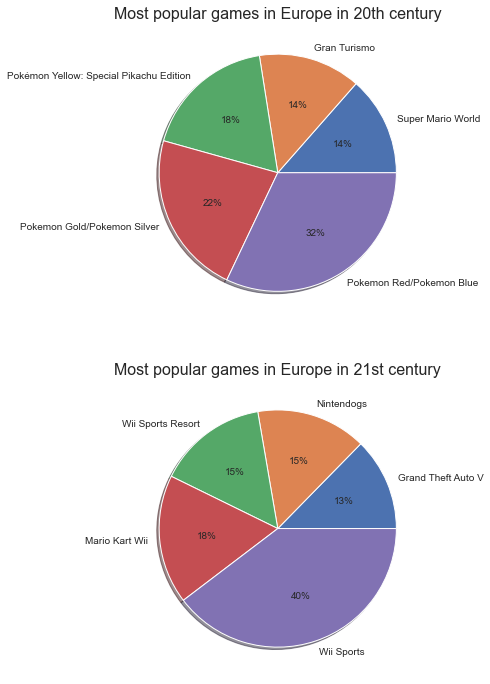

In [26]:
fig = plt.figure(figsize = (12, 12))

plt.subplot(211)
plt.title('Most popular games in Europe in 20th century', size = 16)
labels1 = best_games_EU_XX['Name']
fracs1 = best_games_EU_XX['EU_Sales']
plt.pie(fracs1, labels = labels1, autopct = '%.0f%%', shadow = True, textprops = {'size': 'smaller'})

plt.subplot(212)
plt.title('Most popular games in Europe in 21st century', size = 16)
labels2 = best_games_EU_XXI['Name']
fracs2 = best_games_EU_XXI['EU_Sales']
plt.pie(fracs2, labels = labels2, autopct = '%.0f%%', shadow = True, textprops = {'size': 'smaller'})

plt.show()

Most popular games in Japan in 20th century

In [27]:
best_games_JP_XX = games.query('Year < 2000').sort_values('JP_Sales').tail(5).loc[:, ['Name', 'Platform', 'Genre', 'Publisher', 'JP_Sales']]
best_games_JP_XX

Name Platform         Genre Publisher  JP_Sales
21             Super Mario Land       GB      Platform  Nintendo      4.18
5                        Tetris       GB        Puzzle  Nintendo      4.22
1             Super Mario Bros.      NES      Platform  Nintendo      6.81
12  Pokemon Gold/Pokemon Silver       GB  Role-Playing  Nintendo      7.20
4      Pokemon Red/Pokemon Blue       GB  Role-Playing  Nintendo     10.22

Most popular games in Japan in 21st century

In [28]:
best_games_JP_XXI = games.query('Year >= 2000').sort_values('JP_Sales').tail(5).loc[:, ['Name', 'Platform', 'Genre', 'Publisher', 'JP_Sales']]
best_games_JP_XXI

Name Platform         Genre Publisher  JP_Sales
41    Animal Crossing: Wild World       DS    Simulation  Nintendo      5.33
25  Pokemon Ruby/Pokemon Sapphire      GBA  Role-Playing  Nintendo      5.38
26    Pokemon Black/Pokemon White       DS  Role-Playing  Nintendo      5.65
20  Pokemon Diamond/Pokemon Pearl       DS  Role-Playing  Nintendo      6.04
6           New Super Mario Bros.       DS      Platform  Nintendo      6.50

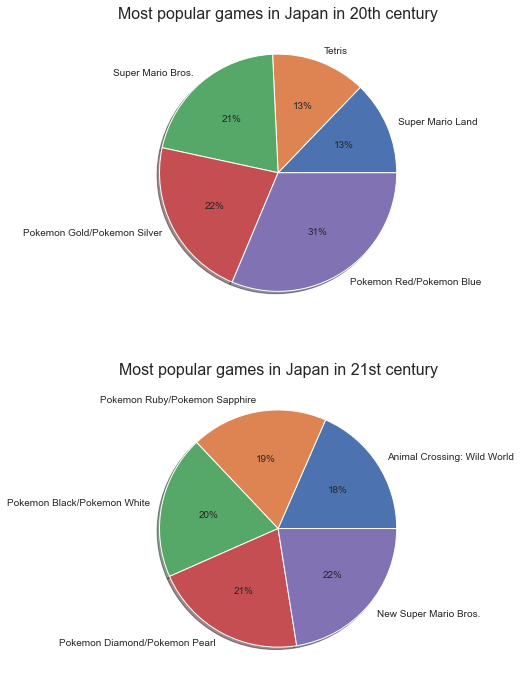

In [29]:
fig = plt.figure(figsize = (12, 12))

plt.subplot(211)
plt.title('Most popular games in Japan in 20th century', size = 16)
labels1 = best_games_JP_XX['Name']
fracs1 = best_games_JP_XX['JP_Sales']
plt.pie(fracs1, labels = labels1, autopct = '%.0f%%', shadow = True, textprops = {'size': 'smaller'})

plt.subplot(212)
plt.title('Most popular games in Japan in 21st century', size = 16)
labels2 = best_games_JP_XXI['Name']
fracs2 = best_games_JP_XXI['JP_Sales']
plt.pie(fracs2, labels = labels2, autopct = '%.0f%%', shadow = True, textprops = {'size': 'smaller'})

plt.show()